In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
train = pd.read_csv("/content/drive/MyDrive/data/emotions_detection/train.txt", sep=";", header=None, names=["Comment", "Emotion"])

In [5]:
test = pd.read_csv("/content/drive/MyDrive/data/emotions_detection/test.txt", sep=";", header=None, names=["Comment", "Emotion"])
val = pd.read_csv("/content/drive/MyDrive/data/emotions_detection/val.txt", sep=";", header=None, names=["Comment", "Emotion"])

In [6]:
emotion_df = pd.concat([train, test, val])
emotion_df.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
!pip install spacy

In [8]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

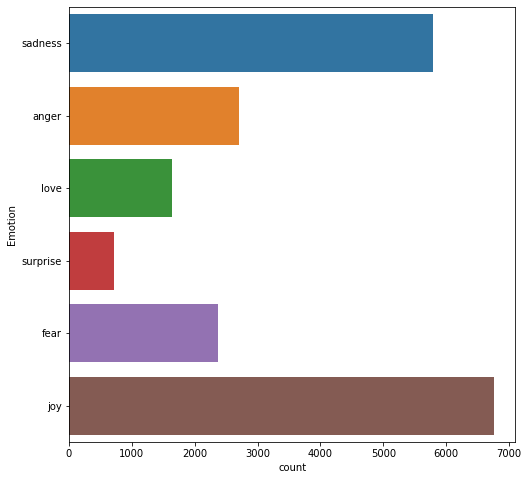

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(y='Emotion', data = emotion_df )

In [11]:
emotion_df["Emotion"].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

In [12]:
emt_dict = {"anger" : 0, "fear" : 1, "joy" : 2, "love" : 3, "sadness" : 4, "surprise" : 5}
emotion_df['Emotion'] = emotion_df['Emotion'].replace(emt_dict)

In [13]:
emotion_df["Emotion"].value_counts()

2    6761
4    5797
0    2709
1    2373
3    1641
5     719
Name: Emotion, dtype: int64

In [14]:
emotion_df["Comment_preprocessed"] = emotion_df["Comment"].apply(preprocess)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(emotion_df["Comment_preprocessed"], emotion_df["Emotion"], test_size = 0.2, random_state = 52, stratify = emotion_df["Emotion"])

In [16]:
import math
math.sqrt(len(Y_test))

63.245553203367585

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# **Random Forest Classifier (TF-IDF)**


In [18]:
clf_rf = Pipeline([
    ('TF-IDF', TfidfVectorizer()),                       
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       542
           1       0.83      0.85      0.84       475
           2       0.84      0.90      0.87      1352
           3       0.80      0.67      0.73       328
           4       0.91      0.88      0.89      1159
           5       0.74      0.76      0.75       144

    accuracy                           0.86      4000
   macro avg       0.83      0.82      0.82      4000
weighted avg       0.86      0.86      0.85      4000



Text(69.0, 0.5, 'Truth')

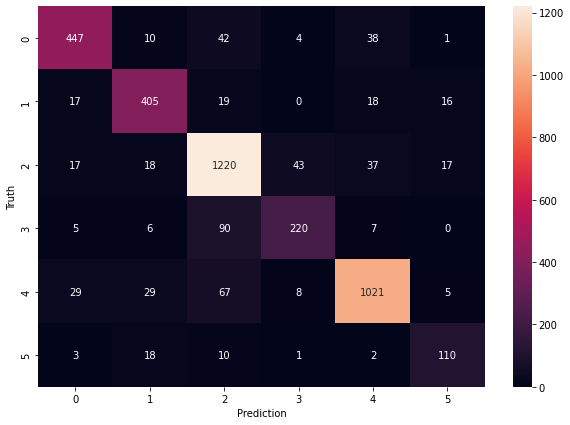

In [19]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize = (10,7))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [38]:
clf_rf = Pipeline([
    ('TF-IDF', TfidfVectorizer(ngram_range = (1, 2))),                       
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       542
           1       0.88      0.81      0.85       475
           2       0.84      0.93      0.88      1352
           3       0.83      0.68      0.75       328
           4       0.90      0.91      0.90      1159
           5       0.77      0.72      0.74       144

    accuracy                           0.87      4000
   macro avg       0.85      0.81      0.83      4000
weighted avg       0.87      0.87      0.86      4000



Text(69.0, 0.5, 'Truth')

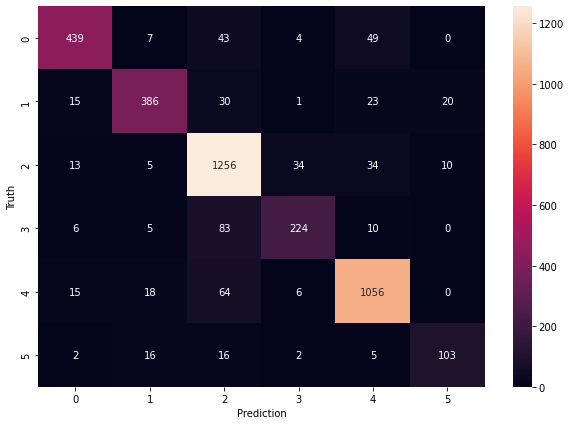

In [39]:
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize = (10,7))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# **MultiNomial NB (TF-IDF)**

In [22]:
clf_nb = Pipeline([
    ('TF-IDF', TfidfVectorizer()), 
    ('MultinomialNB', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.36      0.52       542
           1       0.93      0.30      0.45       475
           2       0.64      0.97      0.77      1352
           3       0.97      0.09      0.16       328
           4       0.69      0.92      0.79      1159
           5       1.00      0.01      0.03       144

    accuracy                           0.69      4000
   macro avg       0.86      0.44      0.45      4000
weighted avg       0.77      0.69      0.63      4000



Text(69.0, 0.5, 'Truth')

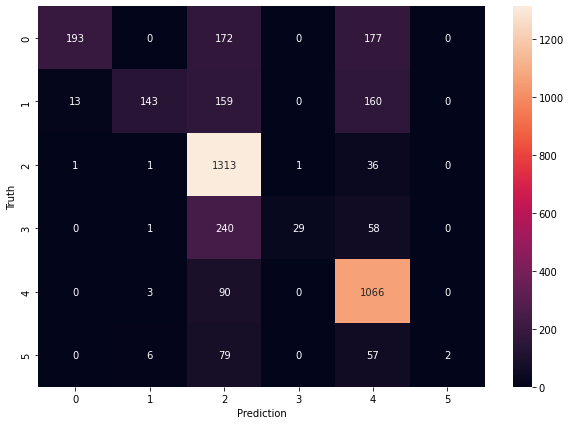

In [23]:
cm_nb = confusion_matrix(Y_test, y_pred_nb)
plt.figure(figsize = (10,7))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [37]:
clf_nb = Pipeline([
    ('TF-IDF', TfidfVectorizer(ngram_range = (1, 2))), 
    ('Multinomial', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.32      0.47       542
           1       0.93      0.29      0.45       475
           2       0.61      0.98      0.75      1352
           3       1.00      0.07      0.13       328
           4       0.72      0.92      0.81      1159
           5       1.00      0.02      0.04       144

    accuracy                           0.68      4000
   macro avg       0.87      0.43      0.44      4000
weighted avg       0.77      0.68      0.62      4000



Text(69.0, 0.5, 'Truth')

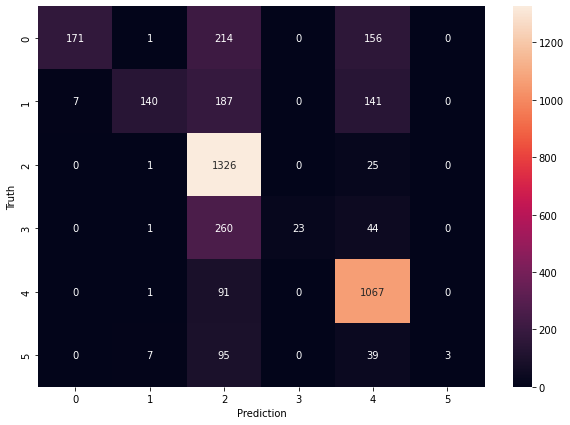

In [35]:
cm_nb = confusion_matrix(Y_test, y_pred_nb)
plt.figure(figsize = (10,7))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# **KNearest Neighbors (TF-IDF)**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
clf_knn = Pipeline([
    ('TF-IDF', TfidfVectorizer()), 
    ('KNN', (KNeighborsClassifier(metric = "euclidean", n_neighbors = 63))) #KNN     
])
clf_knn.fit(X_train, Y_train)
y_pred_knn = clf_knn.predict(X_test)
print(classification_report(Y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       542
           1       0.87      0.71      0.78       475
           2       0.76      0.93      0.84      1352
           3       0.84      0.40      0.54       328
           4       0.78      0.91      0.84      1159
           5       0.79      0.41      0.54       144

    accuracy                           0.80      4000
   macro avg       0.82      0.67      0.71      4000
weighted avg       0.80      0.80      0.78      4000



Text(69.0, 0.5, 'Truth')

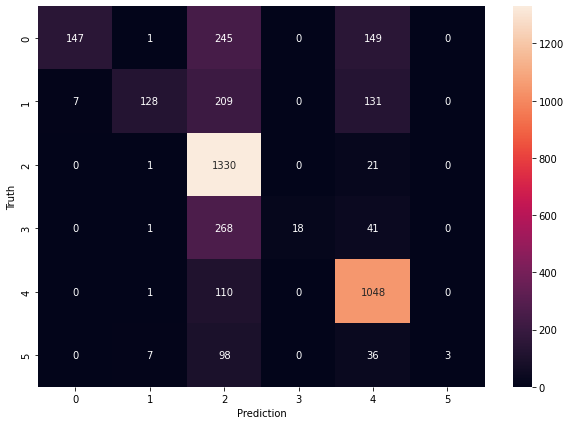

In [29]:
cm_knn = confusion_matrix(Y_test, y_pred_knn)
plt.figure(figsize = (10,7))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [33]:
clf_knn = Pipeline([
    ('TF-IDF', TfidfVectorizer(ngram_range = (1, 3))), 
    ('KNN', (KNeighborsClassifier(metric = "euclidean", n_neighbors = 63))) #KNN     
])
clf_knn.fit(X_train, Y_train)
y_pred_knn = clf_knn.predict(X_test)
print(classification_report(Y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       542
           1       0.87      0.72      0.79       475
           2       0.77      0.92      0.84      1352
           3       0.91      0.41      0.57       328
           4       0.74      0.91      0.81      1159
           5       0.93      0.36      0.52       144

    accuracy                           0.79      4000
   macro avg       0.85      0.66      0.71      4000
weighted avg       0.81      0.79      0.78      4000



Text(69.0, 0.5, 'Truth')

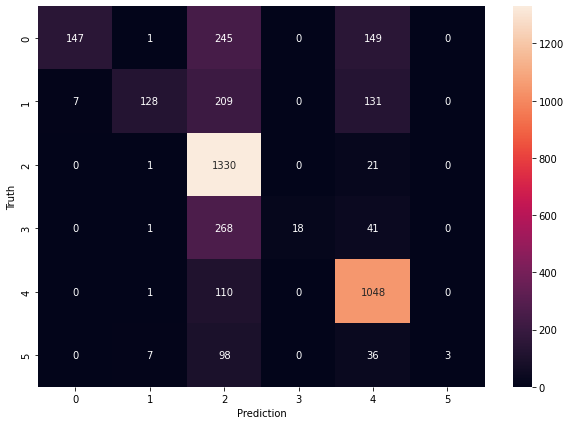

In [31]:
cm_knn = confusion_matrix(Y_test, y_pred_knn)
plt.figure(figsize = (10,7))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# **Random Forest Classifier (CountVectorizer)**

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
clf_rf = Pipeline([
    ('vectorizer', CountVectorizer()),                       
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       542
           1       0.82      0.84      0.83       475
           2       0.91      0.86      0.88      1352
           3       0.71      0.77      0.74       328
           4       0.88      0.89      0.88      1159
           5       0.71      0.80      0.75       144

    accuracy                           0.85      4000
   macro avg       0.81      0.83      0.82      4000
weighted avg       0.86      0.85      0.85      4000



Text(69.0, 0.5, 'Truth')

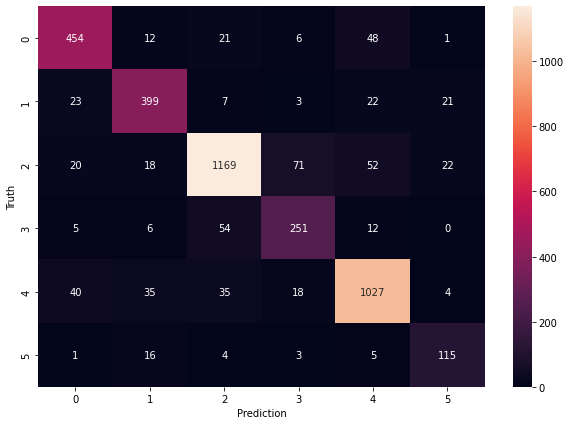

In [42]:
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize = (10,7))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
clf_rf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 2))),                       
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       542
           1       0.90      0.83      0.86       475
           2       0.90      0.90      0.90      1352
           3       0.78      0.73      0.75       328
           4       0.89      0.94      0.91      1159
           5       0.80      0.78      0.79       144

    accuracy                           0.88      4000
   macro avg       0.85      0.84      0.84      4000
weighted avg       0.88      0.88      0.88      4000



Text(69.0, 0.5, 'Truth')

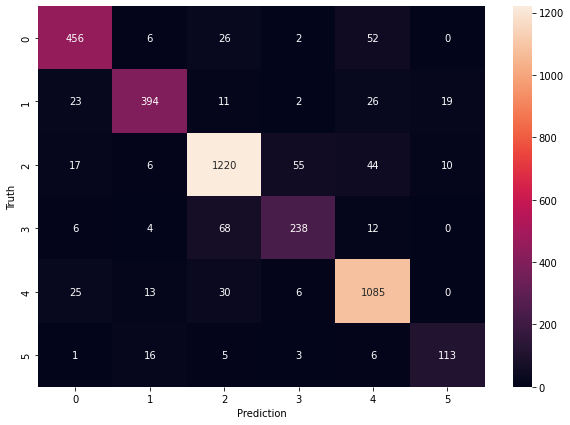

In [50]:
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize = (10,7))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# **MultiNomial NB (CountVectorizer)**

In [47]:
clf_nb = Pipeline([
    ('TF-IDF', CountVectorizer()), 
    ('MultinomialNB', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.67      0.76       542
           1       0.85      0.63      0.73       475
           2       0.76      0.94      0.84      1352
           3       0.89      0.34      0.49       328
           4       0.75      0.92      0.83      1159
           5       0.95      0.12      0.22       144

    accuracy                           0.78      4000
   macro avg       0.85      0.60      0.64      4000
weighted avg       0.80      0.78      0.76      4000



Text(69.0, 0.5, 'Truth')

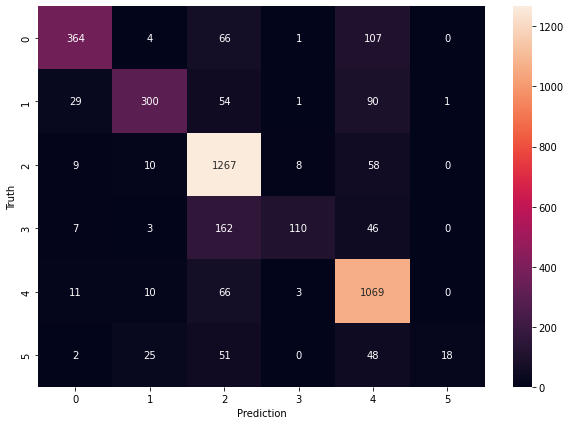

In [48]:
cm_nb = confusion_matrix(Y_test, y_pred_nb)
plt.figure(figsize = (10,7))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [52]:
clf_nb = Pipeline([
    ('TF-IDF', CountVectorizer(ngram_range = (1,2))), 
    ('MultinomialNB', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69       542
           1       0.89      0.55      0.68       475
           2       0.72      0.97      0.83      1352
           3       0.94      0.20      0.32       328
           4       0.73      0.94      0.83      1159
           5       0.94      0.12      0.21       144

    accuracy                           0.76      4000
   macro avg       0.86      0.55      0.59      4000
weighted avg       0.80      0.76      0.73      4000



Text(69.0, 0.5, 'Truth')

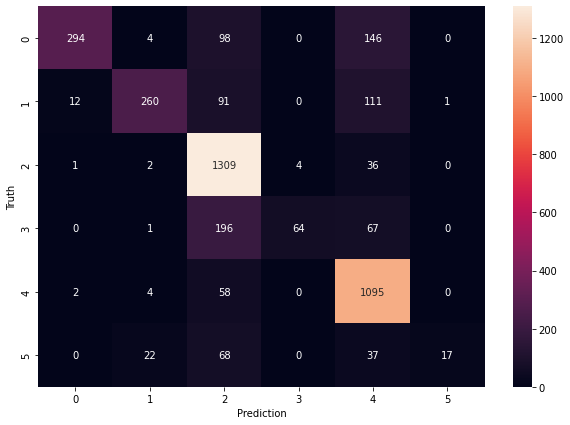

In [53]:
cm_nb = confusion_matrix(Y_test, y_pred_nb)
plt.figure(figsize = (10,7))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')



#**Random Forest performed quite well when compared to Multinomial Naive Bayes.**


In [60]:
joy = emotion_df[emotion_df["Emotion"]==2].sample(719)
sadness = emotion_df[emotion_df["Emotion"]==4].sample(719)
fear = emotion_df[emotion_df["Emotion"]==1].sample(719)
love = emotion_df[emotion_df["Emotion"]==3].sample(719)
anger = emotion_df[emotion_df["Emotion"]==0].sample(719)
surprise = emotion_df[emotion_df["Emotion"]==5].sample(719)
df = pd.concat([joy, sadness, fear, love, anger, surprise], axis = 0)
df.head()

,Comment,Emotion,Comment_preprocessed
10666,i feel increasingly energetic and comfortable ...,2,feel increasingly energetic comfortable inside
9070,i feel that your advice is only useful for the...,2,feel advice useful people believe
13636,i should say how i feel that he s perfect for ...,2,feel s perfect love real
9680,i love my increased intense feeling of connect...,2,love increase intense feeling connection divine
1468,im feeling optimistic to finish out these last...,2,m feel optimistic finish week strong probably ...


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df["Comment_preprocessed"], df["Emotion"], test_size = 0.2, random_state = 52, stratify = df["Emotion"])

# **Random Forest Classifier (UnderSampling)**

In [62]:
clf_rf = Pipeline([
    ('TF-IDF', TfidfVectorizer()),                       
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       143
           1       0.88      0.75      0.81       144
           2       0.69      0.62      0.66       144
           3       0.76      0.90      0.82       144
           4       0.71      0.76      0.73       144
           5       0.87      0.96      0.91       144

    accuracy                           0.79       863
   macro avg       0.79      0.79      0.79       863
weighted avg       0.79      0.79      0.79       863



In [68]:
clf_rf = Pipeline([
    ('TF-IDF', TfidfVectorizer(ngram_range = (1, 2))),                       
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       143
           1       0.89      0.76      0.82       144
           2       0.74      0.56      0.64       144
           3       0.72      0.89      0.80       144
           4       0.70      0.78      0.74       144
           5       0.88      0.94      0.91       144

    accuracy                           0.79       863
   macro avg       0.79      0.79      0.79       863
weighted avg       0.79      0.79      0.79       863



In [70]:
from sklearn.feature_extraction.text import CountVectorizer
clf_rf = Pipeline([
    ('vectorizer', CountVectorizer()),                       
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       143
           1       0.85      0.78      0.82       144
           2       0.75      0.55      0.63       144
           3       0.73      0.86      0.79       144
           4       0.65      0.79      0.71       144
           5       0.89      0.92      0.90       144

    accuracy                           0.78       863
   macro avg       0.79      0.78      0.78       863
weighted avg       0.79      0.78      0.78       863



In [71]:
from sklearn.feature_extraction.text import CountVectorizer
clf_rf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1,3))),                       
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       143
           1       0.84      0.80      0.82       144
           2       0.84      0.50      0.63       144
           3       0.77      0.88      0.82       144
           4       0.62      0.85      0.72       144
           5       0.89      0.91      0.90       144

    accuracy                           0.79       863
   macro avg       0.81      0.79      0.79       863
weighted avg       0.81      0.79      0.79       863



# **MultiNomial NB (UnderSampling)**

In [64]:
clf_nb = Pipeline([
    ('TF-IDF', TfidfVectorizer()), 
    ('MultinomialNB', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       143
           1       0.78      0.81      0.79       144
           2       0.77      0.57      0.65       144
           3       0.74      0.86      0.79       144
           4       0.78      0.75      0.77       144
           5       0.78      0.90      0.83       144

    accuracy                           0.78       863
   macro avg       0.78      0.78      0.78       863
weighted avg       0.78      0.78      0.78       863



In [69]:
clf_nb = Pipeline([
    ('TF-IDF', TfidfVectorizer(ngram_range = (1,3))), 
    ('MultinomialNB', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       143
           1       0.79      0.75      0.77       144
           2       0.77      0.58      0.66       144
           3       0.74      0.86      0.79       144
           4       0.76      0.76      0.76       144
           5       0.79      0.94      0.86       144

    accuracy                           0.78       863
   macro avg       0.78      0.78      0.77       863
weighted avg       0.78      0.78      0.77       863



In [72]:
clf_nb = Pipeline([
    ('TF-IDF', CountVectorizer()), 
    ('MultinomialNB', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       143
           1       0.74      0.75      0.75       144
           2       0.71      0.56      0.63       144
           3       0.72      0.81      0.76       144
           4       0.74      0.76      0.75       144
           5       0.80      0.85      0.83       144

    accuracy                           0.75       863
   macro avg       0.75      0.75      0.75       863
weighted avg       0.75      0.75      0.75       863



In [73]:
clf_nb = Pipeline([
    ('TF-IDF', CountVectorizer(ngram_range = (1,3))), 
    ('MultinomialNB', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       143
           1       0.74      0.73      0.74       144
           2       0.74      0.58      0.65       144
           3       0.73      0.83      0.78       144
           4       0.73      0.73      0.73       144
           5       0.79      0.89      0.84       144

    accuracy                           0.75       863
   macro avg       0.75      0.75      0.75       863
weighted avg       0.75      0.75      0.75       863

